# Is the future of Space Private?

In recent years, we can observe an beggning of a new space race. Top countries like USA and China are restoring and investinig in their space programs. There is a new trend, private companies joining the race. Looking at the data, of space launches, we can try to determine if this trend will fade away or will prevail.

## Introduction to dataset

In this analysis, the [Privatization of Space dataset](https://www.kaggle.com/davidroberts13/one-small-step-for-data) was used. Dataset, has 10.0 usability score on Kaggle, so there is not much of cleaning work required 

In [387]:
import pandas as pd

In [388]:
df = pd.read_csv("data/global-space-launches.csv")

In [389]:
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


Most of the data is categorical, the only numeric value is launch cost.

Column descriptions:
- **Company name** - Name of Organization responsible for launch
- **Location** - Launch location
- **Detail** - Detailed information about Rocket
- **Status Rocket** - Information if a rocket is currently in use
- **Rocket** - Cost of launch in millions USD
- **Status Mission** - Information about result of the launch
- **Country of Launch** - The country where the launch took place
- **Companys Country of Origin** - The country that the organization is from
- **Private or State Run** - The organizations category
- **DateTime**, **Year**, **Month**, **Date**, **Day**, **Time** - Date and time

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company Name                4324 non-null   object
 1   Location                    4324 non-null   object
 2   Detail                      4324 non-null   object
 3   Status Rocket               4324 non-null   object
 4   Rocket                      964 non-null    object
 5   Status Mission              4324 non-null   object
 6   Country of Launch           4324 non-null   object
 7   Companys Country of Origin  4324 non-null   object
 8   Private or State Run        4324 non-null   object
 9   DateTime                    4324 non-null   object
 10  Year                        4324 non-null   int64 
 11  Month                       4324 non-null   int64 
 12  Day                         4324 non-null   int64 
 13  Date                        4324 non-null   obje

Many of launches are missing costs, but attempt to fill the value with generated data, may lead to incorrect assumptions, for now the rows will be droped when costs will be used

In [391]:
df = df.drop(columns=["Detail", "Date", "Location", "Country of Launch", "Month", "Day"])

In [392]:
# Fixing types
df["DateTime"] = pd.to_datetime(df["DateTime"], errors="coerce")
df["Rocket"] = pd.to_numeric(df["Rocket"], errors="coerce")

## Exploration

### How does the space industry looked over the years?

In [393]:
import plotly.express as px

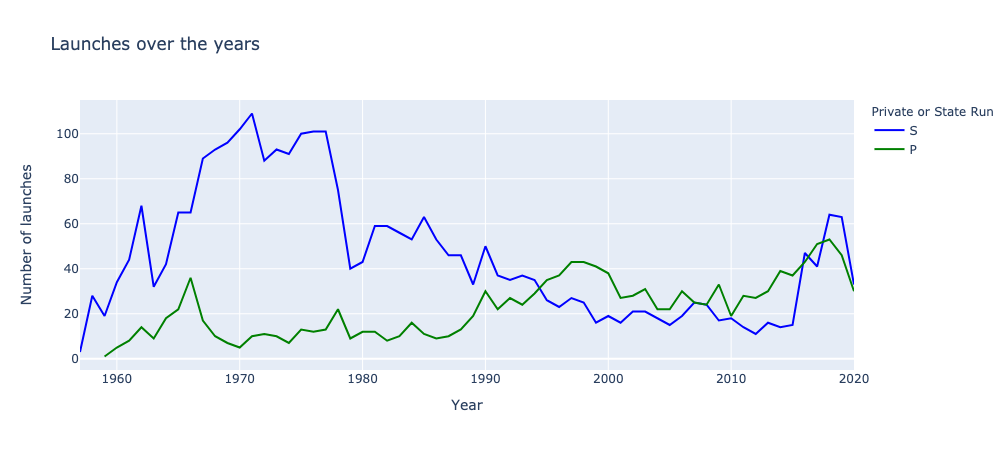

In [394]:
grouped_by_year_and_type = df.groupby(["Year", "Private or State Run"], as_index=False).count()

fig = px.line(grouped_by_year_and_type,
    x="Year",
    y="DateTime",
    color="Private or State Run",
    color_discrete_sequence=["blue", "green"],
    title="Launches over the years",
    labels={"DateTime": "Number of launches"}
)
fig.show()

70's were the time, when most of the space launches took place, and majority of them were state run. For the first time in 1994 the number of state and private run launches was equal. Starting from 1994, until 2016, there were more private launches. Currently there has been a drop in launches, and the number is equal between private and state run. The drop of space launches in recent years, might be explained by the economic impact of COVID-19 pandemic.

## Are private missions cheaper?

In [395]:
df["Rocket"].describe()

count    949.000000
mean     129.795237
std      143.220323
min        5.300000
25%       40.000000
50%       62.000000
75%      164.000000
max      450.000000
Name: Rocket, dtype: float64

In [396]:
print("Average costs of missions", df.groupby(["Private or State Run"])["Rocket"].mean())

Average costs of missions Private or State Run
P    102.669677
S    155.855950
Name: Rocket, dtype: float64


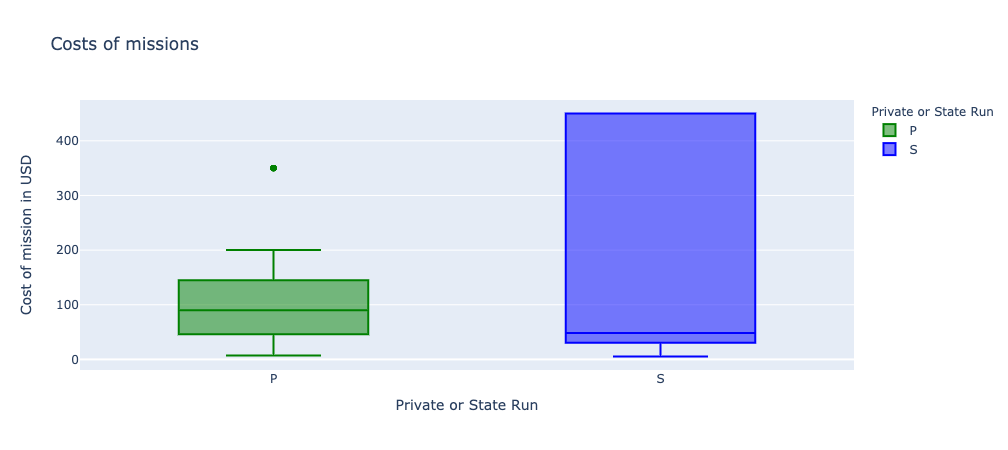

In [397]:
fig = px.box(df,
    title="Costs of missions",
    color="Private or State Run",
    color_discrete_sequence=["green", "blue"],
    x="Private or State Run", y="Rocket",
    labels={"Rocket": "Cost of mission in USD"}
)
fig.show()

On average it is 50% cheaper to lunch a rocket with private company. It might be connected to the rocket reuse, which will be explored later.

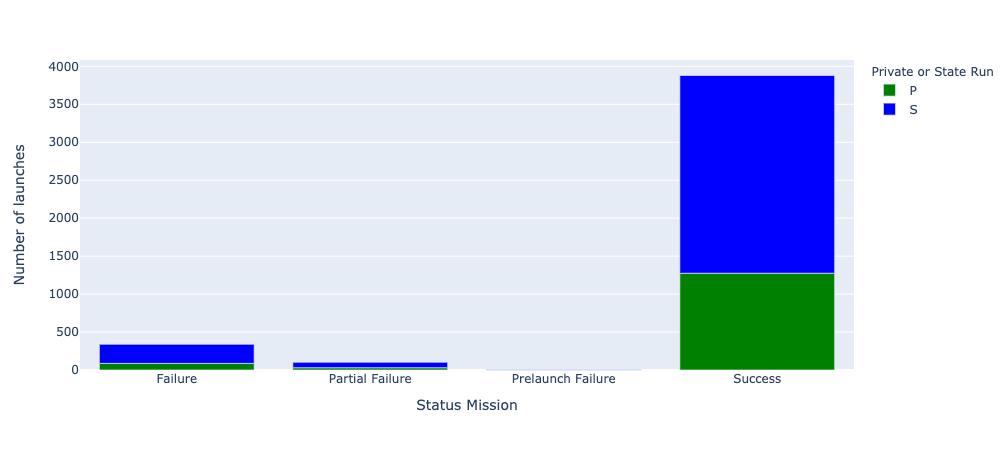

In [398]:
grouped_by_mission_status = df.groupby(["Status Mission", "Private or State Run"], as_index=False)["DateTime"].count()

fig = px.bar(grouped_by_mission_status, x="Status Mission", y="DateTime", color="Private or State Run", labels={"DateTime": "Number of launches"}, color_discrete_sequence=["green", "blue"])
fig.show()

While there has been many more state run launches, the proporiots of missions statuses are simillar. We can calculate the success rate of private missions vs state run missions.

### What is the success rate of private missions?

In [399]:
private = grouped_by_mission_status[grouped_by_mission_status["Private or State Run"] == "P"]

total_private = private["DateTime"].sum()
total_private_suc = private[private["Status Mission"] == "Success"]["DateTime"].sum()

round(total_private_suc / total_private, 2)

0.92

### What is the success rate of state run missions?

In [400]:
state = grouped_by_mission_status[grouped_by_mission_status["Private or State Run"] == "S"]

total_state = state["DateTime"].sum()
total_state_suc = state[state["Status Mission"] == "Success"]["DateTime"].sum()

round(total_state_suc / total_state, 2)

0.89

Comparing the success rate of private run vs state run missions, we can see that for now the private run missions have 3% higher chance of being successfull.

## Are private rockets more reusable?

Reusability of rockets, can drasticly reduce mission costs, let's compare the roket reuse.

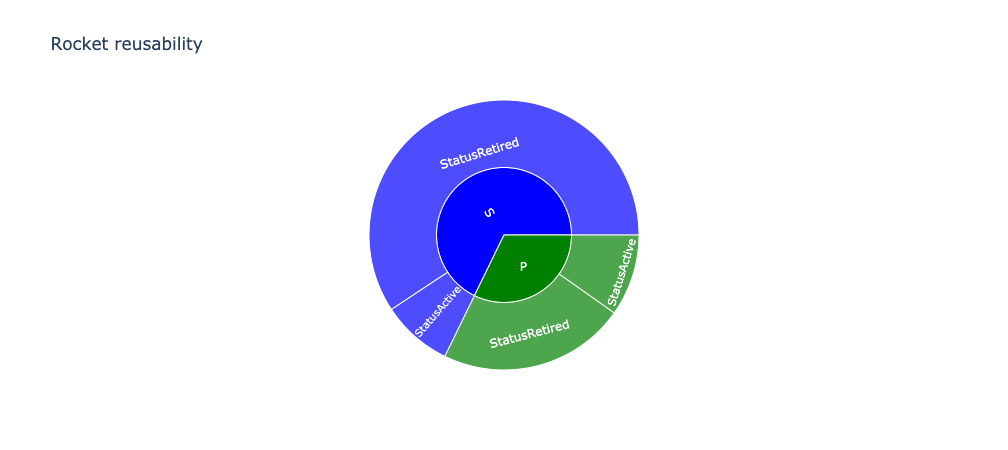

In [401]:
groued_by_rocket_status = df.groupby(["Status Rocket", "Private or State Run"], as_index=False).count()

fig = px.sunburst(
    groued_by_rocket_status,
    values='DateTime',
    path=['Private or State Run', "Status Rocket"],
    color_discrete_sequence=["blue", "green"],
    title="Rocket reusability"
)
fig.show()

It is more frequent for private rocket to be reused, that a state run rocket. The difference between private and state, is high, because nearly 70% private rockets are reused. For state run rockets it's only around 12%.

## Space launches by countries

We can analyse, which countries and which companies are leading the space race

### Wich country has sent most rockets?

In [402]:
df.groupby("Companys Country of Origin")["DateTime"].count()

Companys Country of Origin
Arme de l'Air       4
Brazil              3
China             269
England             2
France              8
Germany            13
India              76
Iran                1
Isreal             24
Italy               9
Japan             126
Multi             339
North Korea         5
Russia           2064
South Korea         3
USA              1374
Ukraine             4
Name: DateTime, dtype: int64

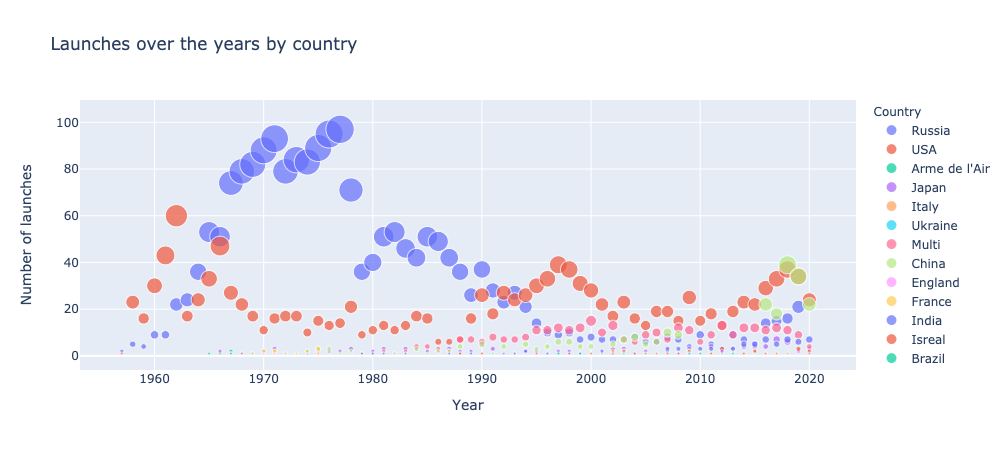

In [403]:
grouped_by_country = df.groupby(["Year", "Companys Country of Origin"], as_index=False)["DateTime"].count()

fig = px.scatter(grouped_by_country,
    x="Year",
    y="DateTime",
    size="DateTime",
    color="Companys Country of Origin",
    title="Launches over the years by country",
    labels={"DateTime": "Number of launches", "Companys Country of Origin": "Country"}
)
fig.show()

Two most consistent countries, are Russia and USA, which led the chart in many years. Looking at the latest years, China has landed in the top 3 countries, beating other in 2018 with 39 launches. In recent years, the number of launches in top the countries is similar, and is around 22 launches.

### What private companies have must successful launches?

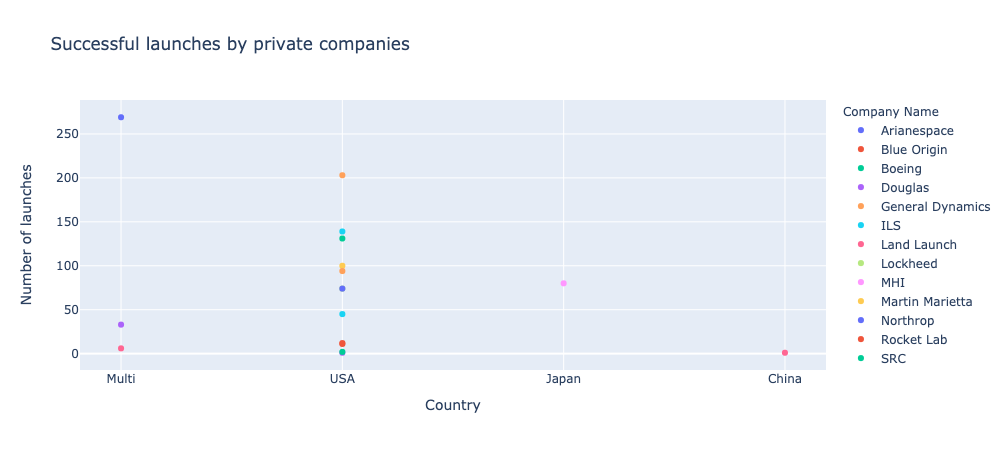

In [404]:
private_launches = df[df["Private or State Run"] == "P"]
private_successful_launches =  private_launches[private_launches["Status Mission"] == "Success"]

grouped_by_country_and_company = private_successful_launches.groupby(["Company Name", "Companys Country of Origin"], as_index=False).count()

fig = px.scatter(
    grouped_by_country_and_company,
    x="Companys Country of Origin",
    y="DateTime",
    color="Company Name",
    title="Successful launches by private companies",
    labels={"DateTime": "Number of launches", "Companys Country of Origin": "Country"}
)
fig.show()

Country with the most successful private companies is USA. The oher competitors are multinational companies or Japan based company MHI.

## Summary

Although there are many more factors, when accessing the success rate of private run launches, than costs, success rate and reusability, looking at the gathered data, the private space industry could take a lead. It is also worth metntion that many of the private run launches, also cooperate or benefit from state programs and resources. The biggest competetive advantage is an abbility to reuse rockets, wich allow to reduce costs, while keeping a high success rate. All that can confirm the assumption that the future of space is private.